In [12]:
# Packages importation

import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
# 1. Créer un tableau rempli aléatoirement avec des valeurs de spin.

# np.random.seed(42)
N= 100
spin_table_initial = np.random.choice([-1, 1], size=(N, N))
spin_table_initial

array([[-1,  1, -1, ...,  1, -1, -1],
       [ 1, -1, -1, ..., -1,  1, -1],
       [-1,  1, -1, ...,  1, -1, -1],
       ...,
       [ 1, -1, -1, ..., -1,  1,  1],
       [-1,  1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1, -1,  1]])

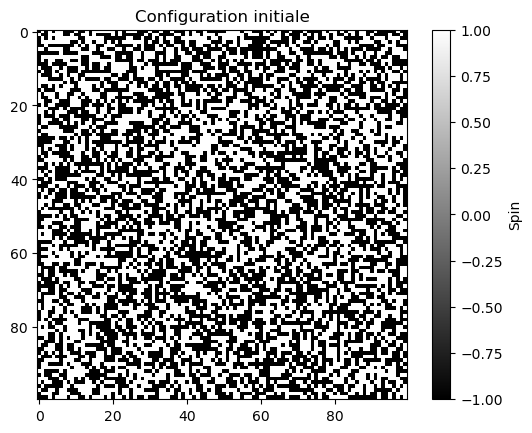

In [14]:
# 2. Afficher le tableau sous forme d'image

plt.imshow(spin_table_initial, cmap='gray', interpolation='nearest')
plt.colorbar(label='Spin')
plt.title('Configuration initiale')
# plt.xticks(np.arange(spin_table_initial.shape[1]), labels=np.arange(1, spin_table_initial.shape[1]+1))
# plt.yticks(np.arange(spin_table_initial.shape[0]), labels=np.arange(1, spin_table_initial.shape[0]+1))

plt.savefig('ising_model/table_de_spin_initiale.png', format='png')

plt.show()

In [15]:
# 3. Calculer l’énergie de la configuration initiale.

def calculate_energy(spin_table, J):
    energy = 0
    rows, cols = spin_table.shape
    for i in range(rows):
        for j in range(cols):
            # Conditions aux bords périodiques
            neighbor_up = spin_table[(i-1) % rows, j]
            neighbor_down = spin_table[(i+1) % rows, j]
            neighbor_left = spin_table[i, (j-1) % cols]
            neighbor_right = spin_table[i, (j+1) % cols]
            
            # Calcul de l'énergie
            energy += J * spin_table[i, j] * (neighbor_up + neighbor_down + neighbor_left + neighbor_right)

    return energy / 2

In [16]:
# 4. On prendra J=1.

energy_initial = calculate_energy(spin_table_initial, J=1)
print("Énergie de la configuration initiale :", energy_initial)

Énergie de la configuration initiale : 64.0


In [17]:
# 5. Choisir un spin au hasard, et appliquer la méthode de Métropolis. Modifier le tableau si
# nécessaire. Réitérer l’opération un grand nombre de fois (100 000 fois).

# Paramètres initiaux
T = 0.1
J = 1
n_iter = 1000

# Méthode de Métropolis
spin_table = spin_table_initial.copy()

for _ in range(n_iter):

    # Configuration initiale
    energy_initial = calculate_energy(spin_table, J)
    P_A = np.exp(-energy_initial / T)

    # Choix aléatoire d'un spin
    rows, cols = spin_table.shape
    i = np.random.randint(0, rows)
    j = np.random.randint(0, cols)

    # Modification de la configuration
    random_spin_value = spin_table[i, j]
    spin_table_modified = spin_table.copy()
    spin_table_modified[i, j] = -random_spin_value

    new_energy = calculate_energy(spin_table_modified, J)
    P_B = np.exp(-new_energy / T)

    # Calcul de R
    if P_B == 0:
        R = np.inf
    else:
        R = P_A / P_B

    # Metropolis
    if R >= 1:
        final_table = spin_table_modified
    else:
        p = random.random()
        if p < R:
            final_table = spin_table_modified
        else:
            final_table = spin_table

    # Mise à jour de la table de spin
    spin_table = final_table
    

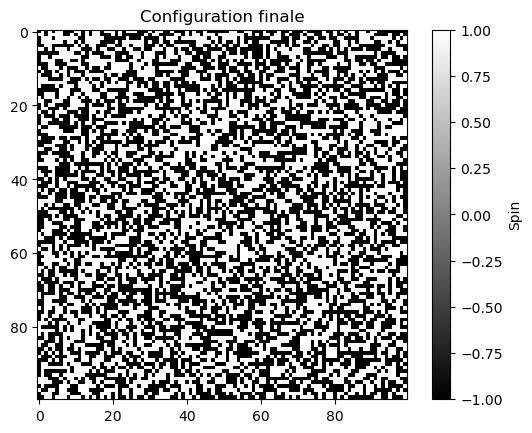

In [18]:
# 6. Afficher la configuration finale sous fore d’image.

plt.imshow(spin_table, cmap='gray', interpolation='nearest')
plt.colorbar(label='Spin')
plt.title('Configuration finale')
# plt.xticks(np.arange(spin_table.shape[1]), labels=np.arange(1, spin_table.shape[1]+1))
# plt.yticks(np.arange(spin_table.shape[0]), labels=np.arange(1, spin_table.shape[0]+1))

plt.savefig('ising_model/table_de_spin_finale.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()

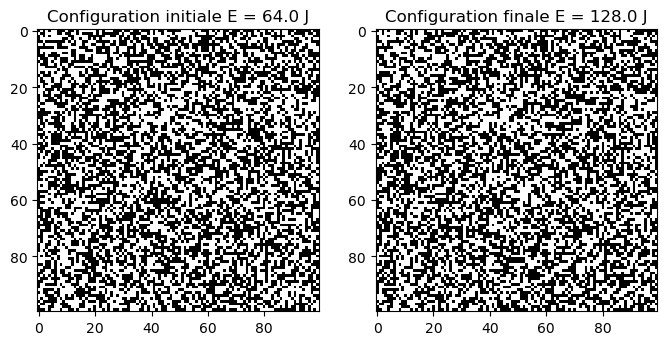

In [20]:
# Subplot configuration initiale et configuration finale

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(spin_table_initial, cmap='gray', interpolation='nearest')
plt.title(f'Configuration initiale E = {calculate_energy(spin_table_initial, J=1)} J')
# plt.xticks(np.arange(spin_table_initial.shape[1]), labels=np.arange(1, spin_table_initial.shape[1]+1))
# plt.yticks(np.arange(spin_table_initial.shape[0]), labels=np.arange(1, spin_table_initial.shape[0]+1))

plt.subplot(122)
plt.imshow(spin_table, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale E = {calculate_energy(spin_table, J=1)} J')
# plt.xticks(np.arange(spin_table.shape[1]), labels=np.arange(1, spin_table.shape[1]+1))
# plt.yticks(np.arange(spin_table.shape[0]), labels=np.arange(1, spin_table.shape[0]+1))

plt.savefig('ising_model/table_de_spin_initiale_vs_finale.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()

In [26]:
# 7. On testera différentes valeurs de température : 0.1,1,10. Interprétation.
n_iter = 10000
def metropolis_function(T, J, spin_table):

    # Méthode de Métropolis sur 100000 itérations
    for _ in range(n_iter):

        # Configuration initiale
        energy_initial = calculate_energy(spin_table, J)
        P_A = np.exp(-energy_initial / T)

        # Choix aléatoire d'un spin
        rows, cols = spin_table.shape
        i = np.random.randint(0, rows)
        j = np.random.randint(0, cols)

        # Modification de la configuration
        random_spin_value = spin_table[i, j]
        spin_table_modified = spin_table.copy()
        spin_table_modified[i, j] = -random_spin_value

        new_energy = calculate_energy(spin_table_modified, J)
        P_B = np.exp(-new_energy / T)

        # Calcul de R
        if P_B == 0:
            R = np.inf
        else:
            R = P_A / P_B

        # Metropolis
        if R >= 1:
            final_table = spin_table_modified
        else:
            p = random.random()
            if p < R:
                final_table = spin_table_modified
            else:
                final_table = spin_table

        # Mise à jour de la table de spin
        spin_table = final_table
        
    return spin_table

In [27]:
J = 1
spin_table_ferro = spin_table_initial.copy()
spin_table_ferro_0_1 = metropolis_function(0.1, J, spin_table_ferro)
spin_table_ferro_1 = metropolis_function(1, J, spin_table_ferro)
spin_table_ferro_10 = metropolis_function(10, J, spin_table_ferro)

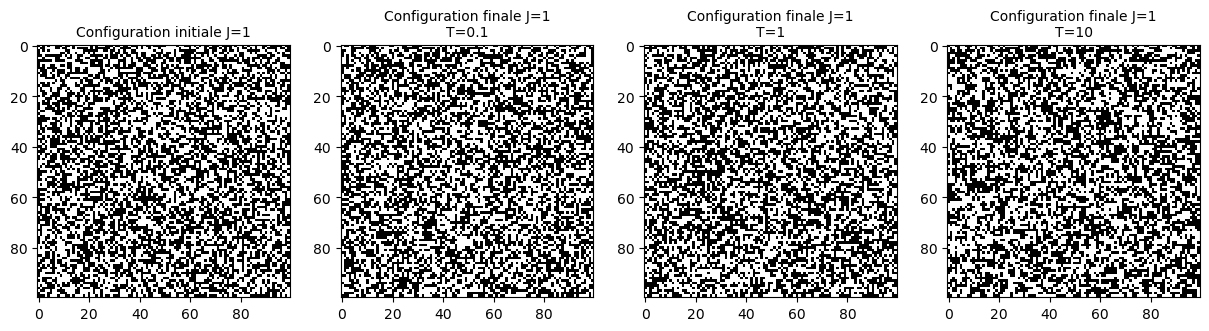

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.imshow(spin_table_ferro, cmap='gray', interpolation='nearest')
plt.title(f'Configuration initiale J=1', fontsize=10)
# plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
# plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.subplot(142)
plt.imshow(spin_table_ferro_0_1, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale J={J}\nT=0.1', fontsize=10)
# plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
# plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.subplot(143)
plt.imshow(spin_table_ferro_1, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale J={J}\nT=1', fontsize=10)
# plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
# plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.subplot(144)
plt.imshow(spin_table_ferro_10, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale J={J}\nT=10', fontsize=10)
# plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
# plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.savefig('ising_model/ferromagnetisme_a_differente_T.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()

In [12]:
# 8. On calculera aussi la magnétisation

def calculate_magnetisation(spin_table):
    N = spin_table.size
    return np.sum(spin_table) / N

# Plage de températures
temperatures = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 6,7,8,9,10]

# Calcul de la magnetisation
J = 1
magnetisations_ferro = []

for T in temperatures:
    spin_table_T = metropolis_function(T, J, spin_table_initial.copy())
    magnetisation = calculate_magnetisation(spin_table_T)
    magnetisations_ferro.append(magnetisation)


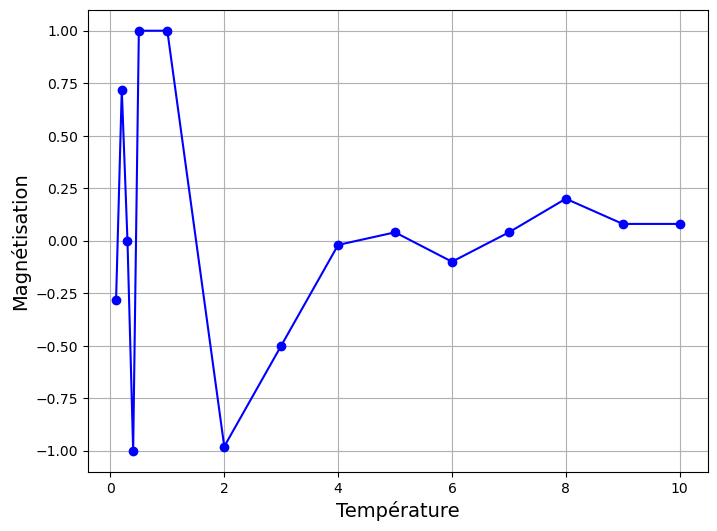

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(temperatures, magnetisations_ferro, marker='o', linestyle='-', color='b')
plt.xlabel('Température', fontsize=14)
plt.ylabel('Magnétisation', fontsize=14)
# plt.title('Magnétisation en fonction de la température')
plt.grid(True)

plt.savefig('ising_model/magnetisation_ferro.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()

In [14]:
# 9. On recommencera l’exercice pour J=-1

J = -1

spin_table_antiferro = spin_table_initial.copy()
spin_table_antiferro_0_1 = metropolis_function(0.1, J, spin_table_antiferro)
spin_table_antiferro_1 = metropolis_function(1, J, spin_table_antiferro)
spin_table_antiferro_10 = metropolis_function(10, J, spin_table_antiferro)

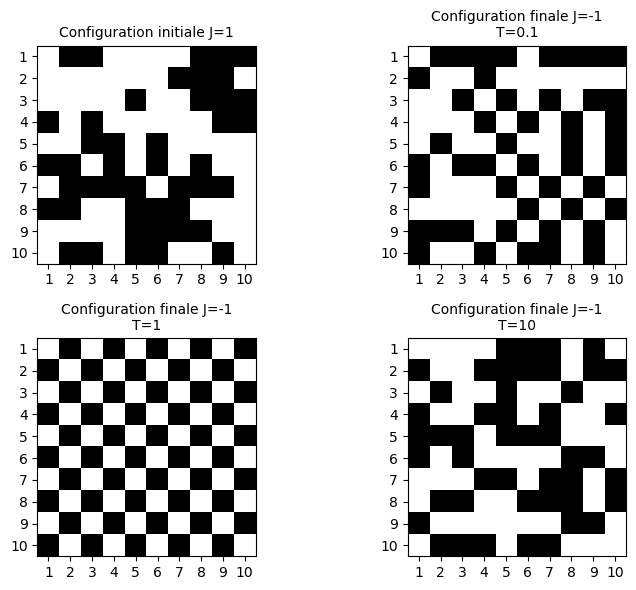

In [15]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(spin_table_antiferro, cmap='gray', interpolation='nearest')
plt.title(f'Configuration initiale J=1', fontsize=10)
plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.subplot(222)
plt.imshow(spin_table_antiferro_0_1, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale J={J}\nT=0.1', fontsize=10)
plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.subplot(223)
plt.imshow(spin_table_antiferro_1, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale J={J}\nT=1', fontsize=10)
plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.subplot(224)
plt.imshow(spin_table_antiferro_10, cmap='gray', interpolation='nearest')
plt.title(f'Configuration finale J={J}\nT=10', fontsize=10)
plt.xticks(np.arange(spin_table_ferro.shape[1]), labels=np.arange(1, spin_table_ferro.shape[1]+1))
plt.yticks(np.arange(spin_table_ferro.shape[0]), labels=np.arange(1, spin_table_ferro.shape[0]+1))

plt.tight_layout()
plt.savefig('ising_model/antiferromagnetisme_a_differente_T.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()

In [16]:
# Range of temperatures to test
temperatures = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 6,7,8,9,10]

# Calculate magnetisation for each temperature
J = -1
magnetisations_antiferro = []

for T in temperatures:
    spin_table_T = metropolis_function(T, J, spin_table_initial.copy())
    magnetisation = calculate_magnetisation(spin_table_T)
    magnetisations_antiferro.append(magnetisation)

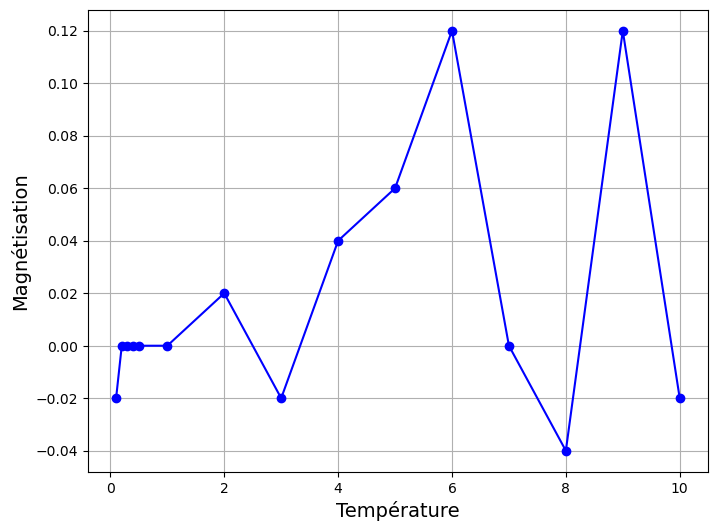

In [17]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(temperatures, magnetisations_antiferro, marker='o', linestyle='-', color='b')
plt.xlabel('Température', fontsize=14)
plt.ylabel('Magnétisation', fontsize=14)
# plt.title('Magnétisation en fonction de la température')
plt.grid(True)

plt.savefig('ising_model/magnetisation_antiferro.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()